In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from google.colab import drive
drive.mount('/content/drive')

# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/MetacodeM/creditcard (1).csv", delimiter=',', dtype=np.float32)

# NaN 값 처리 (여기서는 간단히 제거하는 방법을 사용합니다)
data = data.dropna()

# 특성과 레이블 분리
X = data.drop(columns=['Class'])
y = data['Class']

# 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 모델 및 하이퍼파라미터 그리드 설정
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터
best_params = grid_search.best_params_
print("Best Parameters:\n", best_params)

# 최적의 하이퍼파라미터로 모델 훈련
best_model = grid_search.best_estimator_

# 예측
y_pred = best_model.predict(X_test_scaled)

# 모델 평가
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters:
 {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Confusion Matrix:
 [[6387    3]
 [   3   17]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6390
         1.0       0.85      0.85      0.85        20

    accuracy                           1.00      6410
   macro avg       0.92      0.92      0.92      6410
weighted avg       1.00      1.00      1.00      6410


Accuracy Score: 0.9990639625585024


<Figure size 1000x800 with 0 Axes>

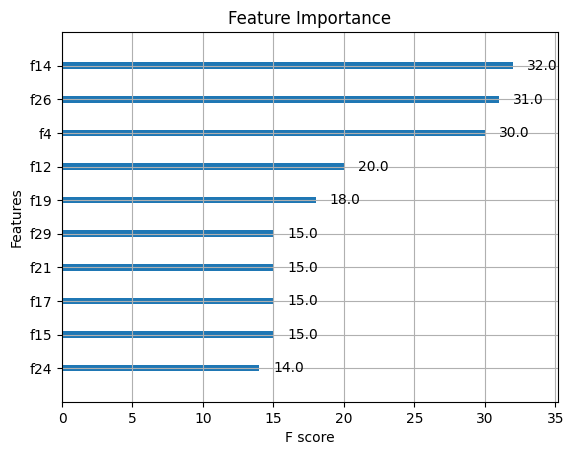

XGBoostError: No evaluation result, `eval_set` is not used during training.

In [6]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plot_importance(best_model, max_num_features=10, importance_type='weight')
plt.title('Feature Importance')
plt.show()

# 학습 곡선 시각화
results = best_model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 8))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters:
 {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Confusion Matrix:
 [[56858     6]
 [   18    80]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9995786664794073


<Figure size 1000x800 with 0 Axes>

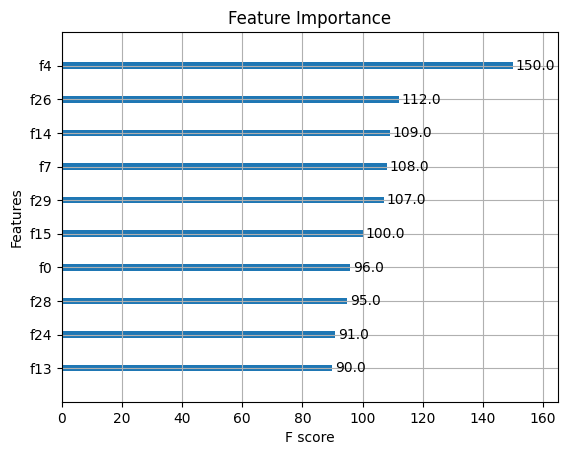

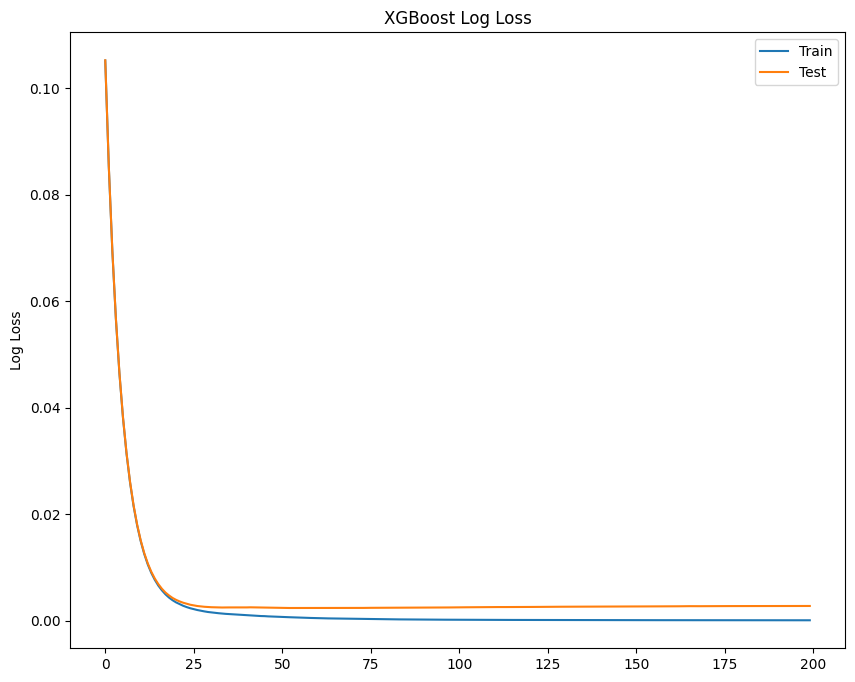

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from xgboost import plot_importance
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/MetacodeM/creditcard (1).csv", delimiter=',', dtype=np.float32)

# NaN 값 처리 (여기서는 간단히 제거하는 방법을 사용합니다)
data = data.dropna()

# 특성과 레이블 분리 및 데이터 분할
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 모델 및 하이퍼파라미터 그리드 설정
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터
best_params = grid_search.best_params_
print("Best Parameters:\n", best_params)

# 최적의 하이퍼파라미터로 모델 훈련
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train_scaled, y_train, eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)], verbose=False)

# 예측
y_pred = best_model.predict(X_test_scaled)

# 모델 평가
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plot_importance(best_model, max_num_features=10, importance_type='weight')
plt.title('Feature Importance')
plt.show()

# 학습 곡선 시각화
results = best_model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 8))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
